# Assignment 1 (Predictive Analytics with Python)
## Parth Patel, Quang Luong, Tuan Dang (CA2022)
### Part 1: Familiarizing and basic testing of kNN algorithm
#### 1.1 Find some other interesting dataset than the Iris dataset from Kaggle on which you can perform kNN classification
We select the Bank Note Authentication UCI dataset from Kaggle:  
https://www.kaggle.com/datasets/shantanuss/banknote-authentication-uci  
This dataset is in the public domain (licence CC0), and its usability is 10.00 by kaggle calculation. The dataset size is 20 kB.  
![alt text](./bankNoteAuthenticationKaggle.png "Bank Note Authentication - Kaggle")

In [1]:
# first, we import neccessary tools
import numpy as np    # this is not used, consider removing

import pandas as pd    # for data preparation and exploration...
from sklearn.model_selection import train_test_split, KFold    # for splitting data into training and testing
from sklearn.neighbors import KNeighborsClassifier    # for k nearest neighbours
from sklearn.metrics import accuracy_score    # for accuracy calculation
import matplotlib.pyplot as plt    # for plotting
import seaborn as sns    # for heatmap


After downloading the dataset, we save it in the same working folder with this ipynb file. The file name is BankNoteAuthentication.csv  
* *We read the file with the following code:*

In [2]:
# Get the bankNote dataframe from the csv file
bankNote=pd.read_csv("BankNoteAuthentication.csv", header=[0])

We run some basic commands to understand the dataset  
* *Print out the column names and the value of the first data row*

In [3]:
header = bankNote.iloc[0]
header

variance    3.62160
skewness    8.66610
curtosis   -2.80730
entropy    -0.44699
class       0.00000
Name: 0, dtype: float64

* *Another way to print out the column names and the value of the first data row*

In [4]:
# Display all the variables in the dataset
all_variables = bankNote.columns
all_variables

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

* *Now we display a summary of the dataset*

In [5]:
# Get summary of each column
bankNote.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


* *We check if there is any missing data in the dataset...*

In [6]:
# Check if any missing data
bankNote.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

*...and found no missing data*

* *We realize the first 4 columns are the features...*

In [7]:
# The features are the columns without the last one (class)
features = bankNote.columns[:-1]
features

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

*...and the last (5th) column is the target*

In [8]:
# The target is the last column (class)
target = bankNote.columns[-1]
target

'class'

* Now let's review the possible outcome in the target

In [9]:
outcome_count = bankNote['class'].value_counts()
outcome_count

class
0    762
1    610
Name: count, dtype: int64

*... and we know that the target has 2 possible outcomes 0 or 1*

#### 1.2. Run kNN algorithm on that data 
* First we define the dataframes for the features and the target

In [10]:
# Separating dataframes for the features and the target
# features
x = bankNote.drop(['class'],axis='columns',inplace=False)
 # target which are 0 or 1
y = bankNote['class']

* *Let's have a look at the features...*

In [11]:
# View the x (feature) dataframe
x

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


* *...and the target*

In [12]:
# View the y (target) dataframe
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

*This is just to view the target in the original dataframe. Note: it must be the same with the y above.*

In [13]:
# View the target in the original dataframe. Note: it must be the same with the y above.
bankNote['class']

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

* Now we plit the data into training and test sets.  
* *Let's use the test size = 0.2 (portion 80:20 for this run)*

In [14]:
# Split data into training and test sets.
# Let's use the test size = 0.2 (portion 80:20 for this run)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = None)   

* Now we run kNN algorithm on the data.  
* Let's run with k=100 for this time

In [15]:
k=100   # We will test the classifier with different values of k to see which value provides the best performance for our classifier, later
knn=KNeighborsClassifier(k)  # Create a KNN classifier
knn.fit(x_train, y_train)           
y_pred_sklearn= knn.predict(x_test)     
print(y_pred_sklearn)        

[0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0
 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1
 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1
 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0
 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1
 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0]


In [16]:
accuracy_score(y_test, y_pred_sklearn)

0.9818181818181818

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

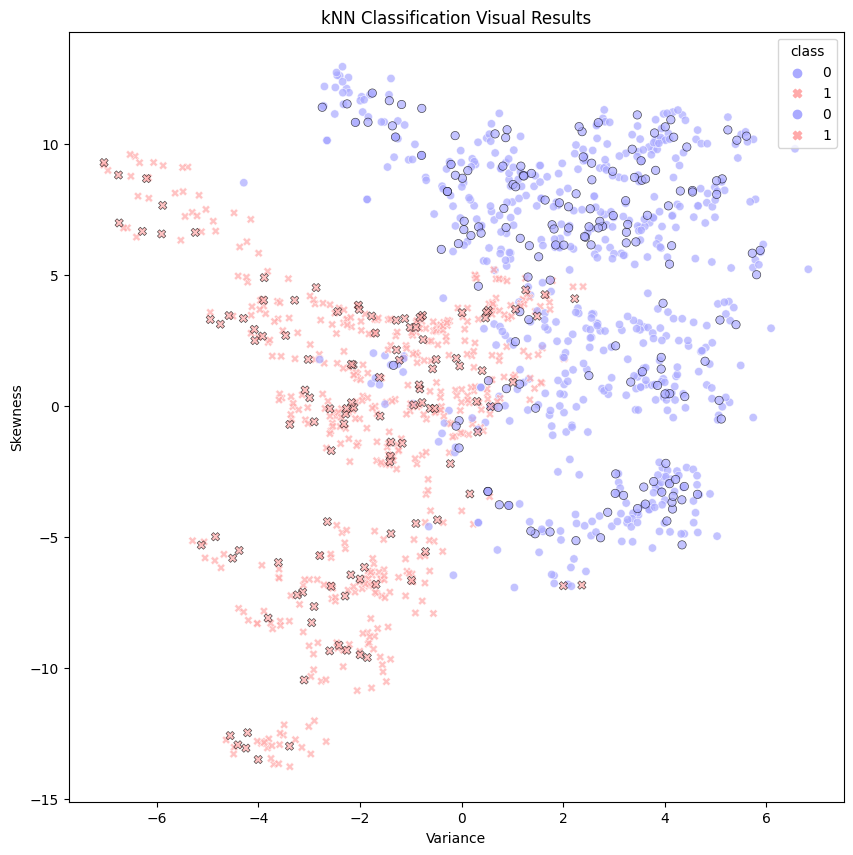

In [17]:
# Resetting the index of the test DataFrame to avoid index-related errors during plotting
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Start the plot
plt.figure(figsize=(10, 10))     # Set the figure size

# Both sets of datapoint use the same color palet (blue, white, red bwr here)
# Training data points with no edge color
sns.scatterplot(x=x_train['variance'], y=x_train['skewness'], 
                hue=y_train, style=y_train, palette='bwr',
                alpha=0.7, legend='brief')      # alpha sets the transparency level

# Test data points with black edge color
sns.scatterplot(x=x_test['variance'], y=x_test['skewness'], 
                hue=y_pred_sklearn, style=y_pred_sklearn, palette='bwr', edgecolor='black', 
                alpha=0.7, legend='brief')

plt.title('kNN Classification Visual Results')      # Set the title
plt.xlabel('Variance')                # Set the x-axis label
plt.ylabel('Skewness')          # Set the y-axis label
plt.legend(title='class')           # Set the legend title
plt.show()                # Show the plot


In [18]:
n_splits= 20
k=100
kf= KFold(n_splits= n_splits, shuffle=True,random_state=None) ## Call the K Fold function
cumulatedScore=0

for train_idx, test_idx in kf.split(x): ## Loop over the splits
    x_train = x.iloc[train_idx, :] ## fetch the values
    x_test = x.iloc[test_idx, :]

    y_train = y.iloc[train_idx] 
    y_test = y.iloc[test_idx]  

    knn=KNeighborsClassifier(k) ## Create the classifier
    knn.fit(x_train, y_train)   ## Fit the classifier

    y_pred_test = knn.predict(x_test) ## Predict the test values

    #print(accuracy_score(y_pred_test, y_test))

    cumulatedScore += accuracy_score(y_pred_test, y_test) ## Sum the accuracies

print(cumulatedScore/n_splits)     ## Print the average accuracy

0.9767050298380221


In [19]:
K=30   # You should test the classifier with different values of K to see which value provides the best performance for your classifier
knn=KNeighborsClassifier(K)         # Create a KNN classifier
knn.fit(x_train, y_train)           
y_pred_sklearn= knn.predict(x_test)     
print(y_pred_sklearn)        

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
